In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train_df = pd.read_csv(filepath_or_buffer="experiments_np_noise.csv")
test_df = pd.read_csv(filepath_or_buffer="experiments_np_noise_test.csv")
validation_df = pd.read_csv(filepath_or_buffer="experiments_np_noise_validation.csv")

train_df.head()

,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,...,9_95,9_96,9_97,9_98,9_99,decay_0,decay_1,W_0,W_1,J_0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,1.4,1.0,0.8,2.8
1,0,0,0,0,0,0,0,0,0,0,...,1,3,1,1,0,0.2,3.4,2.6,2.8,4.5
2,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,0,2.0,1.3,3.2,2.5,3.9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,1,1.5,1.8,3.0,3.4,3.9
4,0,0,0,0,0,0,0,0,0,0,...,3,2,0,0,0,2.8,2.0,3.8,5.3,3.3


In [5]:
from tensorflow.python.keras.regularizers import L2
import re
learning_rate = 0.01
epochs = 17
batch_size = 50

keys = train_df.keys()
keys.drop(['W_0', 'W_1', 'J_0'])
inputs = {key:tf.keras.layers.Input(shape=(1,), name=key) for key in keys}
concatenated_inputs = tf.keras.layers.concatenate(inputs.values())
# Prepare data for training
train_features = {key: train_df[key] for key in inputs}
train_labels = train_df[['W_0', 'W_1', 'J_0']]

# Similarly prepare test and validation data
test_features = {key: test_df[key] for key in inputs}
test_labels = test_df[['W_0', 'W_1', 'J_0']]

validation_features = {key: validation_df[key] for key in inputs}
validation_labels = validation_df[['W_0', 'W_1', 'J_0']]


hidden_layer_1 = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=L2(0.001))(concatenated_inputs)
hidden_layer_2 = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=L2(0.001))(hidden_layer_1)
hidden_layer_3 = tf.keras.layers.Dense(1024, activation='relu')(hidden_layer_2)
hidden_layer_4 = tf.keras.layers.Dense(1024, activation='relu')(hidden_layer_3)

output = tf.keras.layers.Dense(3)(hidden_layer_4) #TODO magic number

model = tf.keras.Model(inputs=inputs, outputs=output)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')


In [ ]:

# Train the model
history = model.fit(train_features, train_labels, validation_data=(validation_features, validation_labels), epochs=epochs, batch_size=batch_size)

# Evaluate the model
model.evaluate(test_features, test_labels)

# Extract loss and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/17
200/200 [==============================] - 10s 51ms/step - loss: 0.0327 - val_loss: 0.0377
Epoch 2/17
200/200 [==============================] - 10s 52ms/step - loss: 0.0303 - val_loss: 0.0394
Epoch 3/17
200/200 [==============================] - 10s 51ms/step - loss: 0.0247 - val_loss: 0.0280
Epoch 4/17
200/200 [==============================] - 12s 60ms/step - loss: 0.0267 - val_loss: 0.0366
Epoch 5/17
200/200 [==============================] - 12s 62ms/step - loss: 0.0327 - val_loss: 0.0315
Epoch 6/17
200/200 [==============================] - 10s 49ms/step - loss: 0.0236 - val_loss: 0.0356
Epoch 7/17
  5/200 [..............................] - ETA: 6s - loss: 0.0259

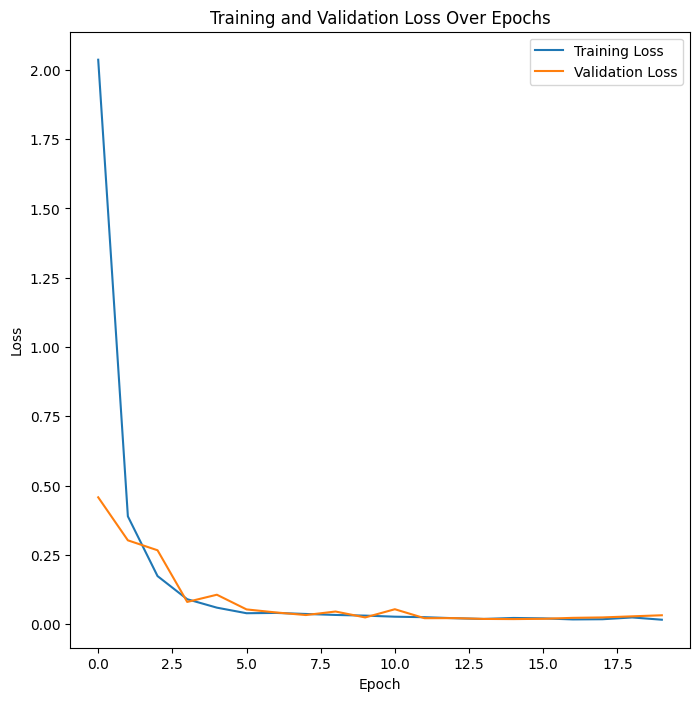

In [33]:
epochs_range = range(epochs)

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [41]:
import numpy as np

new_data = pd.read_csv("experiments.csv")
first_line = new_data.iloc[3]
#input_data = {key: [first_line[key]] for key in inputs}
input_data = {key: np.array([first_line[key]]) for key in inputs}
predictions = model.predict(input_data)
print("Predicted values for W_0, W_1, J_0:", predictions[0])


1/1 [==============================] - 1s 830ms/step
Predicted values for W_0, W_1, J_0: [1.7773902 2.8291454 3.0305264]
